In [15]:
%matplotlib inline

import math

import numpy as np
import scipy as sp
import pandas as pd

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [2]:
data = pd.read_csv('../data/add_0_stations.csv')

In [3]:
df = data[data['count']>0]
len(df)
df["rate"] = df["Total"]/df["count"]
df = df.drop('ZIP', 1).drop('percent_male', 1).drop('count', 1).drop('Total', 1)
df = df.dropna()

/opt/anaconda/envs/capstone/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [4]:
ndata = df.values

In [5]:
ndata[0:2]
df

,MedianAge,percentCollegeDegree,MedianIncome,percent_own,rate
0,19.4,0.6,0,0.000000,6402.000000
1,29.1,0.0,31496,0.000000,752.000000
2,19.4,0.7,0,0.000000,2562.000000
3,22.0,1.9,35673,0.000000,952.000000
4,41.0,0.0,0,0.000000,175.000000
5,30.3,33.6,26541,0.000000,1330.000000
6,36.3,0.0,7333,0.000000,735.000000
7,19.2,0.6,12917,0.000000,1570.250000
8,21.2,3.3,30696,0.000000,6637.000000
10,30.2,80.9,45339,0.000000,2945.000000


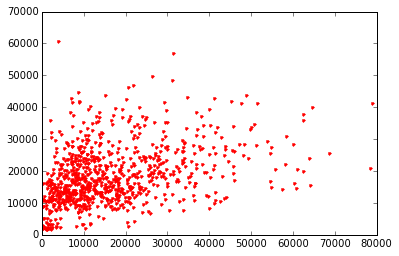

0.0456487364639 10259.9171382 178942803.092 0.0217205489364


In [16]:
# np.random.shuffle(ndata)
split = math.floor(len(ndata)*0.8)
train = ndata[:split]
dev = ndata[split:]
# print train
# print train[:,0:4]
# print train[:,4]


lin_reg = RandomForestRegressor()
lin_reg.fit(train[:,0:4], train[:,4])

# Make predictions on dev data
dev_predictions = lin_reg.predict(dev[:,0:4])
# print accuracy_score(dev[:,4], dev_predictions)
# print dev[:,4]
# print dev_predictions


import matplotlib.pyplot as plt
plt.plot(dev[:,4], dev_predictions, 'r.')
# plt.axis([0, 6, 0, 20])
plt.show()
_explained_variance_score = explained_variance_score(dev[:,4], dev_predictions)
_mean_absolute_error = mean_absolute_error(dev[:,4], dev_predictions)
_mean_squared_error = mean_squared_error(dev[:,4], dev_predictions)
_r2_score = r2_score(dev[:,4], dev_predictions)

print _explained_variance_score, _mean_absolute_error, _mean_squared_error, _r2_score